In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/clean_psyphysical_main3_debrief.csv")

#Create unique players
df["player_nb"] = "p" + df["player"].astype(str)
df["player"] = df["player"].astype(str)
df["player"] = df["player"] + df["participant_code"]

#Combine session code with mastok session
df["mk_session"] = df["mk_session"].replace('mk:psyphysical_main:', 'mk_', regex=True)
df["mk_session"] = df["mk_session"] + "_" + df["session_code"]

In [21]:
df["mean_aggresive_dominance"].mean()

2.404761904761905

C:\Users\DanielZander\AppData\Local\Temp\ipykernel_14892\1279285681.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.catplot(x="player", y="value", hue="variable", data=melted_dominance_measuire,


<Figure size 1000x600 with 0 Axes>

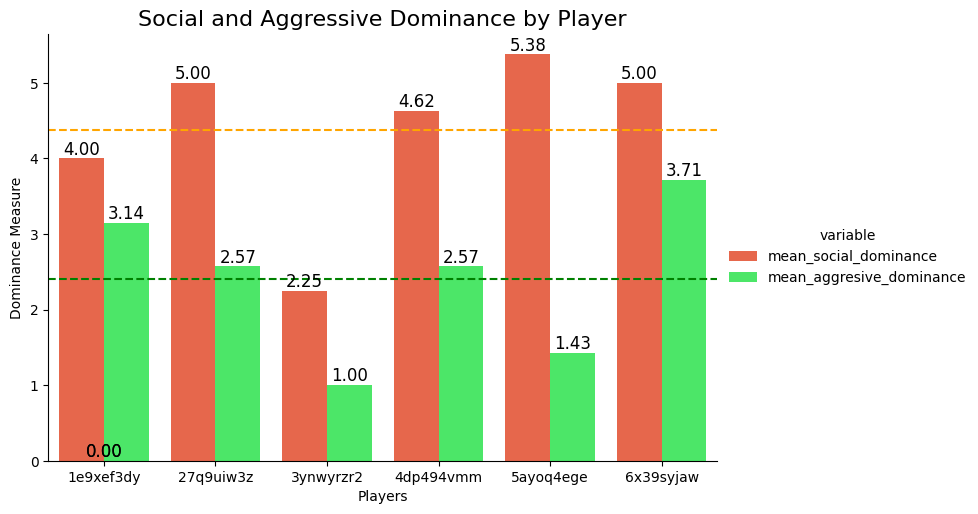

In [23]:
melted_dominance_measuire = pd.melt(df, id_vars=["player"], value_vars=["mean_social_dominance", "mean_aggresive_dominance"])

custom_palette = ['#FF5733', '#33FF57', '#3357FF']

plt.figure(figsize=(10, 6))

# Create the catplot
plot = sns.catplot(x="player", y="value", hue="variable", data=melted_dominance_measuire, 
                   kind="bar", aspect=1.5, palette=custom_palette)

# Add titles and labels
plot.set_axis_labels("Players", "Dominance Measure")
plt.title("Social and Aggressive Dominance by Player", fontsize=16)

# Add horizontal lines for global means
social_mean = 4.375
aggressive_mean = 2.404761904761905
for ax in plot.axes.flat:
    ax.axhline(y=social_mean, color='orange', linestyle='--', label='Global Mean Social Dominance')
    ax.axhline(y=aggressive_mean, color='green', linestyle='--', label='Global Mean Aggressive Dominance')

# Add value annotations
for ax in plot.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
